In [1]:
import json
import pandas as pd
from tensorflow.keras.models import load_model
from src.plotting import plot_roc, get_nn_roc_vals
from tensorflow_addons.metrics import F1Score

In [7]:
roc_df_p = r'E:/Faculta/Anul2/Disertatie/cognitive-aether/datasets/v2/validate/10_rayleigh_fading_ofdm.csv'
nn_cfg_path = r'E:/Faculta/Anul2/Disertatie/cognitive-aether/configs/train.json'
model_path = r'E:/Faculta\Anul2/Disertatie/cognitive-aether/models_weights/energy_detect_v1/energy_detect_v1_epoch10_vloss0.43.hdf5'

In [8]:
with open(nn_cfg_path) as json_file:
    model_cfg = json.load(json_file)

In [9]:
model = load_model(model_path,
                   custom_objects={"F1Score": F1Score})

In [10]:
roc_df = pd.read_csv(roc_df_p)

In [ ]:
fps, tps, auc_v = get_nn_roc_vals(roc_df, model, model_cfg)

(79899,) (79899, 1)


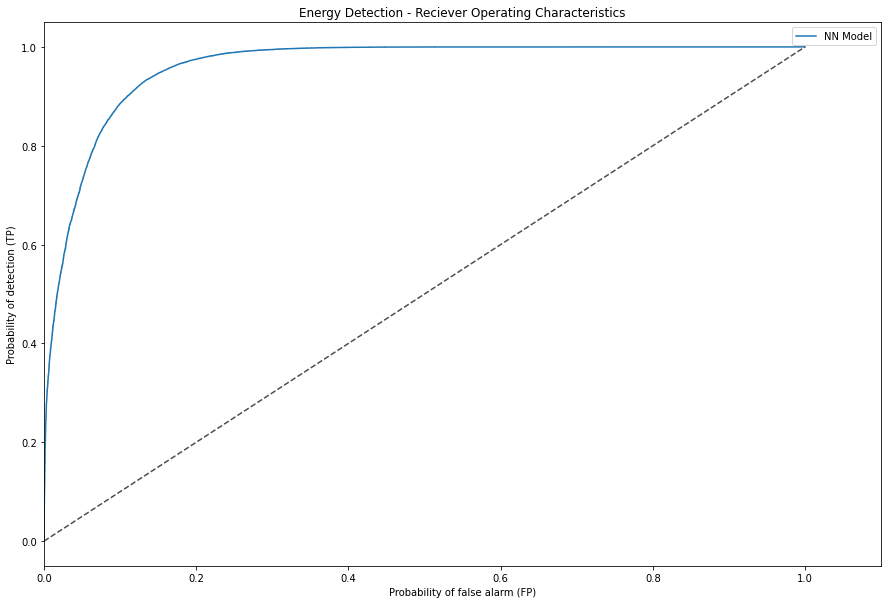

In [11]:
plot_roc(roc_test_df=roc_df, compare_signals=['RX_BAYES'], nn_model_setup=(model, model_cfg))